In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
cancer = load_breast_cancer()

In [11]:
data = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [12]:
X = cancer['data']
Y = cancer['target']

X_folds = np.array_split(X, 10)
Y_folds = np.array_split(Y, 10)

for k in range(10):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(Y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)

In [161]:
X_test.shape

(56, 30)

Dimensionando dados completos

In [13]:
scaler=StandardScaler()
scaler.fit(cancer['data'])
scaled_data=scaler.transform(cancer['data'])

Dimensionando dados Teste

In [14]:
scaler=StandardScaler()
scaler.fit(X_test)
scaled_data_test=scaler.transform(X_test)

Dimensionando dados Treino

In [15]:
scaler=StandardScaler()
scaler.fit(X_train)
scaled_data_train=scaler.transform(X_train)

# Utilizando PCA

In [32]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+str(x) for x in range (1, len(per_var)+1)]

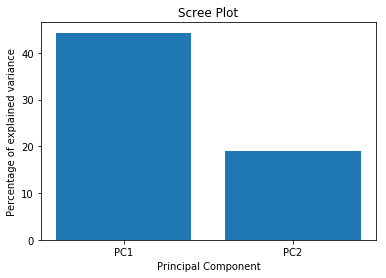

In [33]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0.5, 1.0, 'Gráfico PCA')

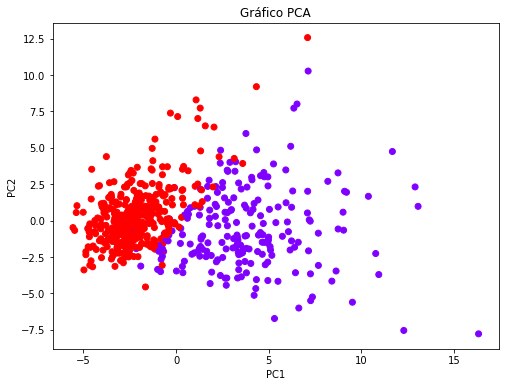

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfico PCA')

In [9]:
pca.score(scaled_data)

-31.684883509998407

# Utilizando LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [162]:
lda = LDA()
lda_data = lda.fit(scaled_data_train, y_train).transform(scaled_data_train)

In [163]:
lda.predict(scaled_data_test)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [164]:
lda.score(scaled_data_test,y_test)

0.9285714285714286

In [136]:
scaled_data_test.shape

(56, 30)

Text(0.5, 1.0, 'Gráfico LDA')

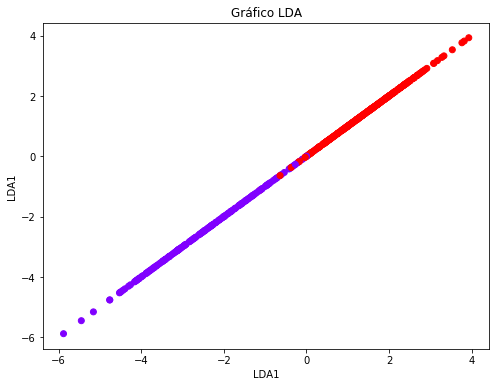

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(lda_data[:,0],lda_data[:,0],c=cancer['target'],cmap='rainbow')
plt.xlabel('LDA1')
plt.ylabel('LDA1')
plt.title('Gráfico LDA')

# Using PCA - LDA

PCA Treino

In [152]:
pca = PCA(n_components=13)
pca.fit(scaled_data_train)
pca_data_train = pca.transform(scaled_data_train)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+str(x) for x in range (1, len(per_var)+1)]

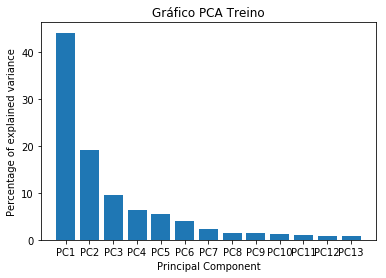

In [153]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Gráfico PCA Treino')
plt.show()

PCA Teste

In [154]:
pca = PCA(n_components=13)
pca.fit(scaled_data_test)
pca_data_test = pca.transform(scaled_data_test)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+str(x) for x in range (1, len(per_var)+1)]

In [155]:
per_var

array([47.8, 17.4, 10.4,  7.3,  5.5,  2.8,  2.3,  1.5,  1. ,  0.9,  0.8,
        0.6,  0.4])

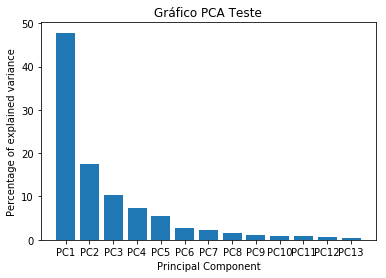

In [156]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Gráfico PCA Teste')
plt.show()

LDA

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_pca = LDA(n_components = 2)
lda_pca_data = lda_pca.fit(pca_data_train, y_train).transform(pca_data_train)

In [158]:
lda_pca.predict(pca_data_test)

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [159]:
lda_pca.score(pca_data_test,y_test)

0.9464285714285714

In [138]:
pca_data_test.shape

(56, 13)

Text(0.5, 1.0, 'Gráfico PCA + LDA')

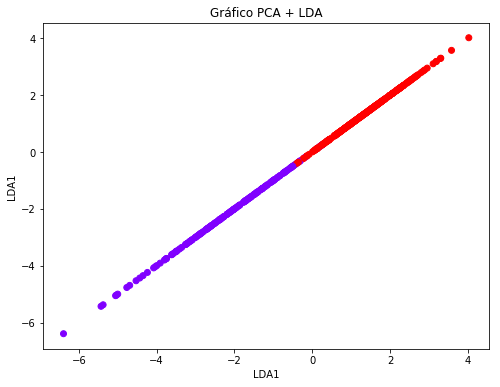

In [139]:
plt.figure(figsize=(8,6))
plt.scatter(lda_pca_data[:,0],lda_pca_data[:,0],c=y_train,cmap='rainbow')
plt.xlabel('LDA1')
plt.ylabel('LDA1')
plt.title('Gráfico PCA + LDA')